# AMAN ARPIT

In [116]:
# Importing the required Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import PowerTransformer

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [5]:
#Loding the dataset
df = pd.read_csv(r"C:\Users\91700\Downloads\bank+marketing\bank-additional\bank-additional\bank-additional-full.csv", delimiter=';')
df_raw = df.copy()

In [6]:
df_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df_raw.shape

(41188, 21)

In [11]:
df_raw.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
df_raw.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000




# Exploratory Data Analysis

In [14]:
#checking for duplicate data
df_raw.duplicated().sum()

12

In [19]:
#As there are 12 duplicate values let's drop those values
print("Before : ",df_raw.shape)
df_n=df_raw.drop_duplicates()
df_n.reset_index(drop=True, inplace=True)
print("After : ",df_n.shape)

print("Number of duplicate data are: ",df_n.duplicated().sum())

Before :  (41188, 21)
After :  (41176, 21)
Number of duplicate data are:  0


In [20]:
# Preliminary Check
# Variable : age
# Description : Customer's age

var ='age'
print('variable :', var)
print()
print('Descriptive stats:')
print(df[var].describe(percentiles=[0.5]))

variable : age

Descriptive stats:
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
50%         38.00000
max         98.00000
Name: age, dtype: float64


The minimum age is 17 ,max age is 98 and mean is around 40


In [21]:
# Variable : job
# Description : types of job

var='job'
print('variable:', var)
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].unique())

variable: job

Unique Value Count: 12
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [22]:
# Variable : marital
# Description : marital status

var = 'marital'

print('variable:', var)
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].unique())

variable: marital

Unique Value Count: 4
['married' 'single' 'divorced' 'unknown']


In [23]:
# Variable : education

var = 'education'
print('variable:', var)
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].unique())


variable: education

Unique Value Count: 8
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [24]:
# Variable : default

var = 'default'
print('variable:', var)
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].unique())

variable: default

Unique Value Count: 3
['no' 'unknown' 'yes']


In [25]:
# Variable : housing


var ='housing'

print('variable:', var)
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].unique())

variable: housing

Unique Value Count: 3
['no' 'yes' 'unknown']


In [26]:
# Preliminary Check
# Variable : month
# Description :last contact month of year 
var = 'month'
print('variable:', var)
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].unique())
print(df[var].dtype)

variable: month

Unique Value Count: 10
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
object


In [27]:
#converting months into numerical value
month_rename = {'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'mar':3, 'apr':4, 'sep':9}
df['month'] = df['month'].map(month_rename).astype(object)

print(df['month'].unique())

[5 6 7 8 10 11 12 3 4 9]


In [29]:
var = 'day_of_week'

print('variable:', var)
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].unique())
print(df[var].dtype)

variable: day_of_week

Unique Value Count: 5
['mon' 'tue' 'wed' 'thu' 'fri']
object


In [30]:
days_rename = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5,}
df['day_of_week'] = df['day_of_week'].map(days_rename)

print(df['day_of_week'].unique())

[1 2 3 4 5]


In [31]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [32]:
# Description : last contact duration, in seconds (numeric). 

var = 'duration'
print('variable:', var)
print()
print('Descriptive stats:')
print(df[var].describe().round())

variable: duration

Descriptive stats:
count    41188.0
mean       258.0
std        259.0
min          0.0
25%        102.0
50%        180.0
75%        319.0
max       4918.0
Name: duration, dtype: float64


As we can see here the difference between min and max value is to high,Here we may have outliers.

In [33]:
 # Description : number of contacts performed during this campaign and for this client

var = 'campaign'

print('variable:', var)
print()
print('Descriptive stats:')
print(df[var].describe().round())

variable: campaign

Descriptive stats:
count    41188.0
mean         3.0
std          3.0
min          1.0
25%          1.0
50%          2.0
75%          3.0
max         56.0
Name: campaign, dtype: float64


In [34]:
# Description : number of days that passed by after the client was last contacted from a previous campaign

var = 'pdays'

print('variable:', var)
print()
print('Descriptive stats:')
print(df[var].describe().round())

variable: pdays

Descriptive stats:
count    41188.0
mean       962.0
std        187.0
min          0.0
25%        999.0
50%        999.0
75%        999.0
max        999.0
Name: pdays, dtype: float64


we may have outliers here also


In [35]:
# Description : number of contacts performed before this campaign and for this client (numeric)

var = 'previous'

print('variable:', var)
print()
print('Descriptive stats:')
print(df[var].describe().round())

variable: previous

Descriptive stats:
count    41188.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          7.0
Name: previous, dtype: float64


In [36]:
# Variable : poutcome
# Description : outcome of the previous marketing campaign
var = 'poutcome'

print('variable:', var)
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].unique())
print(df[var].dtype)

variable: poutcome

Unique Value Count: 3
['nonexistent' 'failure' 'success']
object


In [37]:
# Description : employment variation rate 

var = 'emp.var.rate'

print('variable:', var)
print()
print('Descriptive stats:')
print(df[var].describe().round())

variable: emp.var.rate

Descriptive stats:
count    41188.0
mean         0.0
std          2.0
min         -3.0
25%         -2.0
50%          1.0
75%          1.0
max          1.0
Name: emp.var.rate, dtype: float64


In [38]:
df.rename(columns={'emp.var.rate':'emp_var_rate'}, inplace=True)

In [39]:
# Description : consumer price index - monthly indicator (numeric)


var = 'cons.price.idx'

print('variable:', var)
print()
print('Descriptive stats:')
print(df[var].describe().round())

variable: cons.price.idx

Descriptive stats:
count    41188.0
mean        94.0
std          1.0
min         92.0
25%         93.0
50%         94.0
75%         94.0
max         95.0
Name: cons.price.idx, dtype: float64


In [41]:
df.rename(columns={'cons.price.idx':'cons_price_idx'}, inplace=True)
df.rename(columns={'cons.conf.idx':'cons_conf_idx'}, inplace=True)
df.rename(columns={'nr.employed':'nr_employed'}, inplace=True)

In [42]:
# Description :  Subscribed or not?
var = 'y'

print('variable:', var)
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].unique())
print(df[var].dtype)

variable: y

Unique Value Count: 2
['no' 'yes']
object


In [43]:
#let's change it into numeric value that is 0 or 1
y_rename = {'yes':1, 'no':0}
df['y'] = df['y'].map(y_rename)

print(df['y'].unique())

[0 1]


In [44]:
df.rename(columns={'y':'subs_status'}, inplace=True)

In [48]:
df.head(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subs_status
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [53]:
print(df['subs_status'].value_counts())
print()
print(df['subs_status'].value_counts(normalize=True)*100)

0    36548
1     4640
Name: subs_status, dtype: int64

0    88.734583
1    11.265417
Name: subs_status, dtype: float64


C:\Users\91700\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


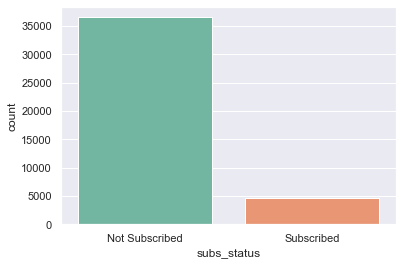

In [54]:
m= sns.countplot(df['subs_status'], palette='Set2')
m.set(xticklabels=['Not Subscribed', 'Subscribed'])
plt.show()

C:\Users\91700\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


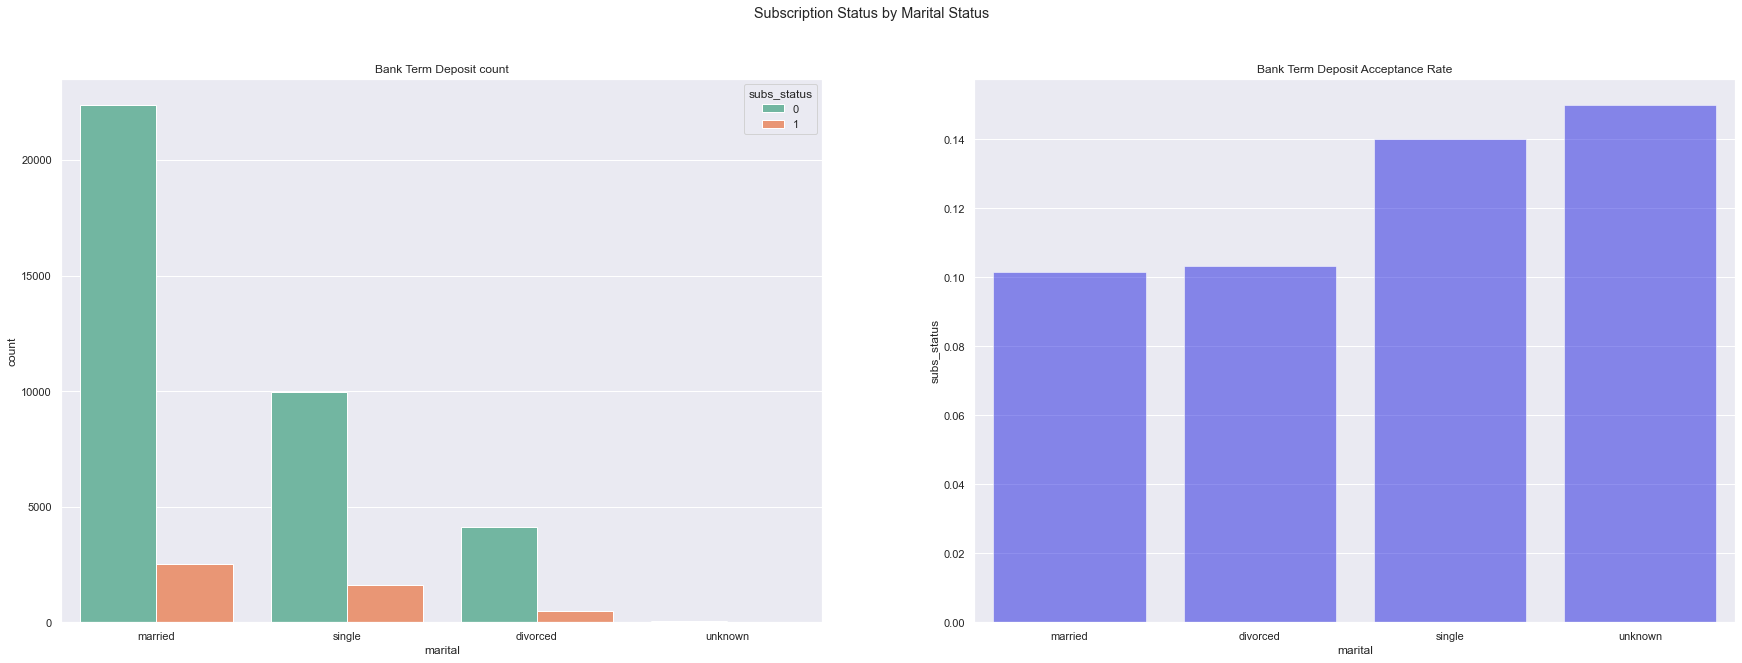

In [55]:
#Analyzing the marital status
fig, ax = plt.subplots(1,2, figsize=(30, 10))
plt.suptitle('Subscription Status by Marital Status')
sns.countplot(df['marital'], hue=df['subs_status'], palette='Set2', order=df['marital'].value_counts().index, ax=ax[0])
ax[0].set_title('Bank Term Deposit count')
graph = df.groupby('marital')['subs_status'].mean().sort_values()
sns.barplot(x=graph.index, y=graph, color='blue', alpha=0.5, ax=ax[1])
ax[1].set_title('Bank Term Deposit Acceptance Rate')


plt.show()


C:\Users\91700\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


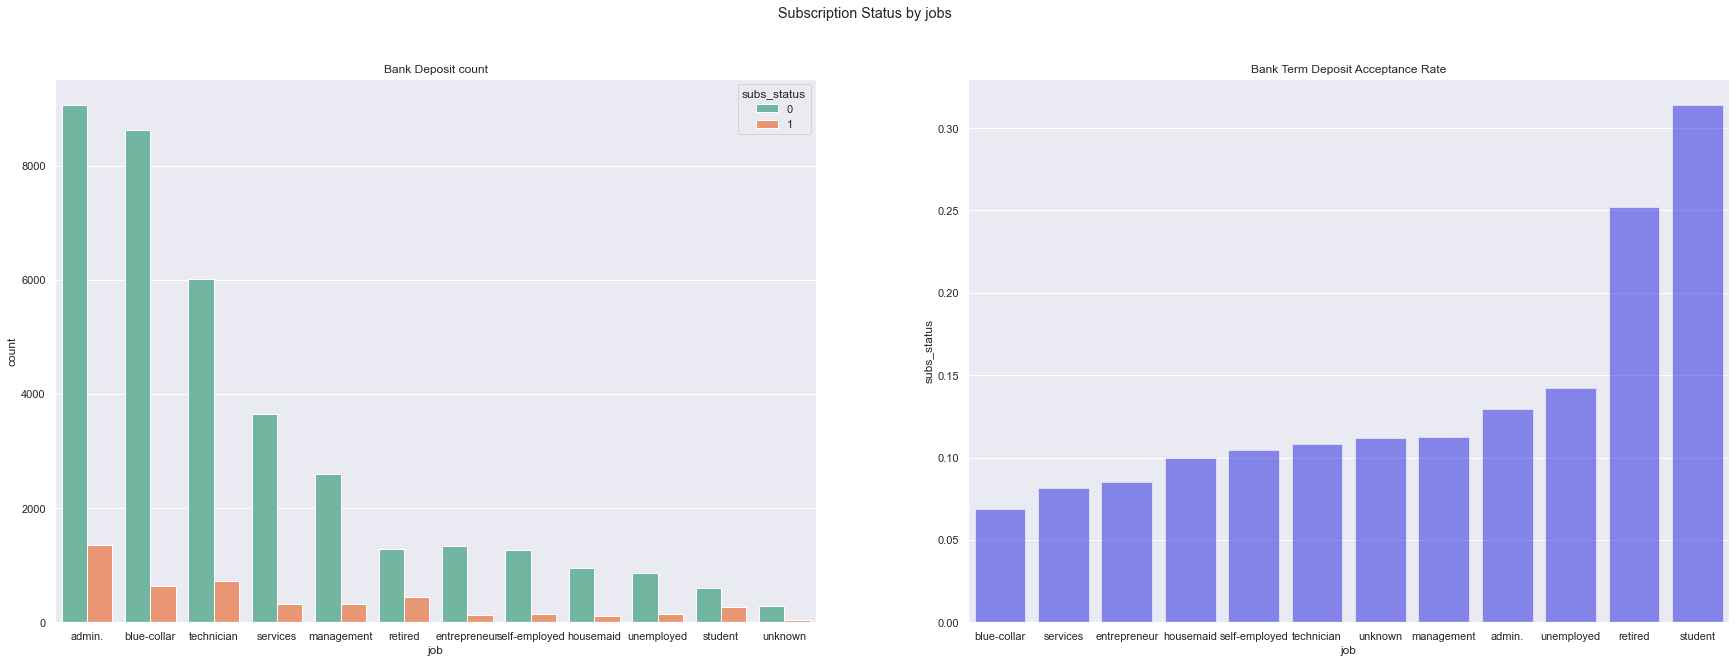

In [59]:
fig,ax=plt.subplots(1,2, figsize=(30,10))
plt.suptitle('Subscription Status by jobs')
sns.countplot(df['job'], hue=df['subs_status'],palette='Set2', order=df['job'].value_counts().index,ax=ax[0])
ax[0].set_title('Bank Deposit count')

graph = df.groupby('job')['subs_status'].mean().sort_values()
sns.barplot(x=graph.index, y=graph, color='blue', alpha=0.5, ax=ax[1])
ax[1].set_title('Bank Term Deposit Acceptance Rate')

plt.show()

Student and Retired people have high acceptance rate



Admin and blue collar are frequent clients of the company


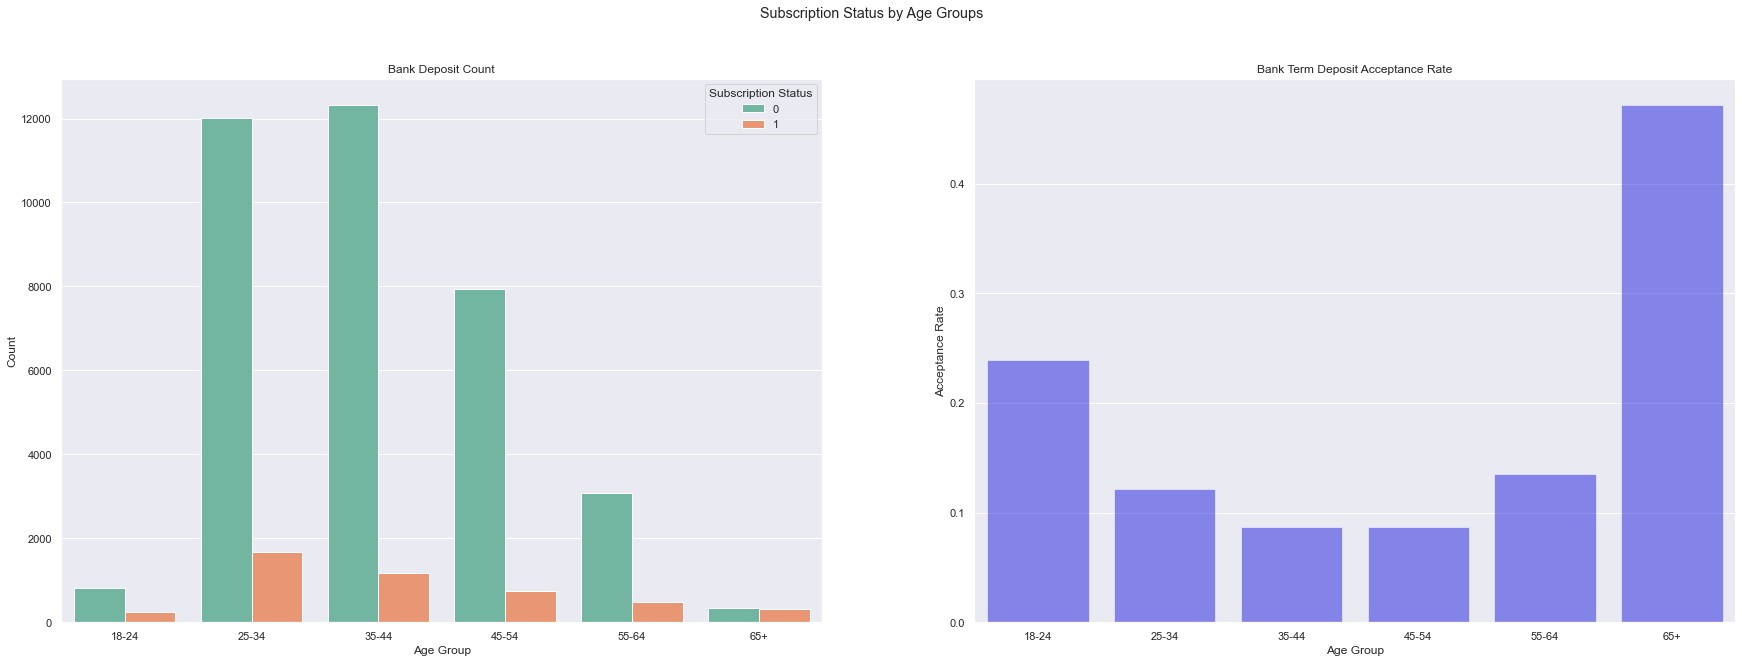

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt


age_groups = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
age_bins = [18, 25, 35, 45, 55, 65, 100]
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_groups, right=False)


fig, ax = plt.subplots(1, 2, figsize=(30, 10))
plt.suptitle('Subscription Status by Age Groups')

sns.countplot(x='age_group', hue='subs_status', palette='Set2', order=age_groups, data=df, ax=ax[0])
ax[0].set_title('Bank Deposit Count')
ax[0].set_xlabel('Age Group')
ax[0].set_ylabel('Count')
ax[0].legend(title='Subscription Status')

graph = df.groupby('age_group')['subs_status'].mean().sort_values()
sns.barplot(x=graph.index, y=graph, color='blue', alpha=0.5, ax=ax[1])
ax[1].set_title('Bank Term Deposit Acceptance Rate')
ax[1].set_xlabel('Age Group')
ax[1].set_ylabel('Acceptance Rate')

plt.show()


Age group between 25-34 are frequent clients 

People above the age of 65 have higher acceptance rate 

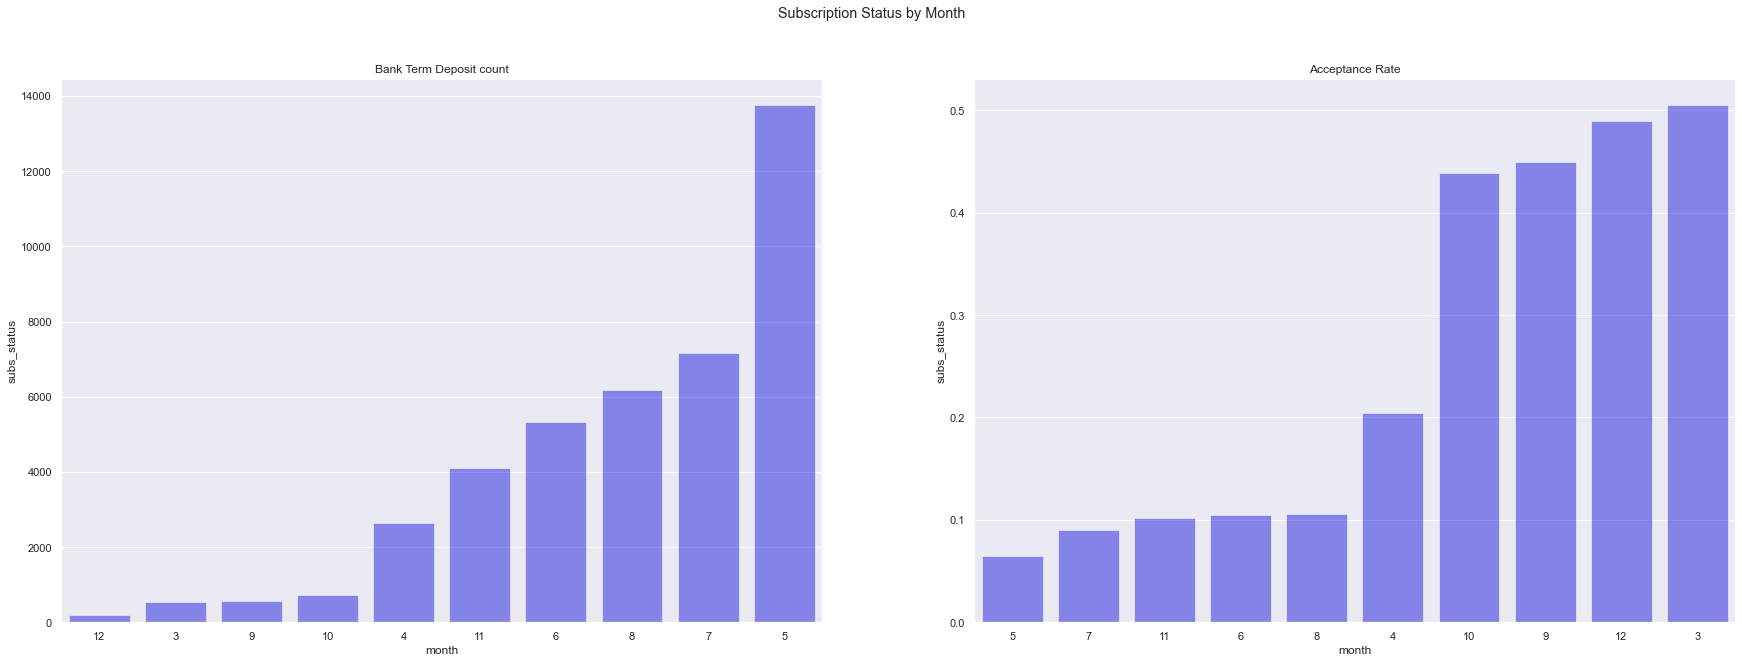

In [65]:
fig, ax = plt.subplots(1,2, figsize=(30, 10))
plt.suptitle('Subscription Status by Month')

graph = df.groupby('month')['subs_status'].count().sort_values()
sns.barplot(x=graph.index, y=graph, order=graph.index, color='blue', alpha=0.5, ax=ax[0])
ax[0].set_title('Bank Term Deposit count')

graph = df.groupby('month')['subs_status'].mean().sort_values()
sns.barplot(x=graph.index, y=graph, order=graph.index, color='blue', alpha=0.5, ax=ax[1])
ax[1].set_title('Acceptance Rate')

plt.show()

In May the clients are highest 

.

# Data Preprocessing

    16 Samples for inference set ,70% Train set and 30% Test set

In [66]:
random_state = 42

In [67]:
inf_set=df.sample(16,random_state=random_state)


In [73]:
inf_set.shape

(16, 22)

In [72]:
#Dropping the inference data 

train_test_data=df.drop(inf_set.index)
train_test_data.reset_index(drop=True,inplace=True)
train_test_data.shape

(41172, 22)

In [75]:
df.shape

(41188, 22)

In [77]:
# Splitting the data

# X input parameter only
X = train_test_data.drop(['subs_status'], axis=1)

# y target parameter only
y = train_test_data['subs_status']

In [106]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


C:\Users\91700\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [107]:
print("Train set : ",X_train.shape)
print("Test set : ",X_test.shape)
print("Inference set : ",inf_set.shape)


Train set :  (32937, 55)
Test set :  (8235, 55)
Inference set :  (16, 22)


In [108]:
from scipy import stats

z_scores = stats.zscore(df['previous'])
df_no_outliers = df[(z_scores < 3) & (z_scores > -3)]


In [109]:
from scipy import stats

z_scores = stats.zscore(df['duration'])
df_no_outliers = df[(z_scores < 3) & (z_scores > -3)]


In [110]:
from scipy import stats

z_scores = stats.zscore(df['campaign'])
df_no_outliers = df[(z_scores < 3) & (z_scores > -3)]


In [111]:
from scipy import stats

z_scores = stats.zscore(df['pdays'])
df_no_outliers = df[(z_scores < 3) & (z_scores > -3)]


In [112]:
from scipy import stats

z_scores = stats.zscore(df['age'])
df_no_outliers = df[(z_scores < 3) & (z_scores > -3)]


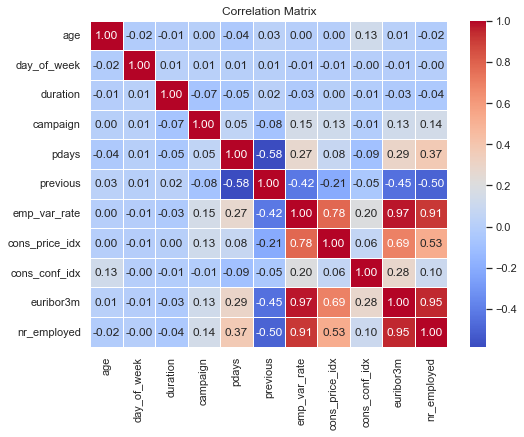

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = X_train[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


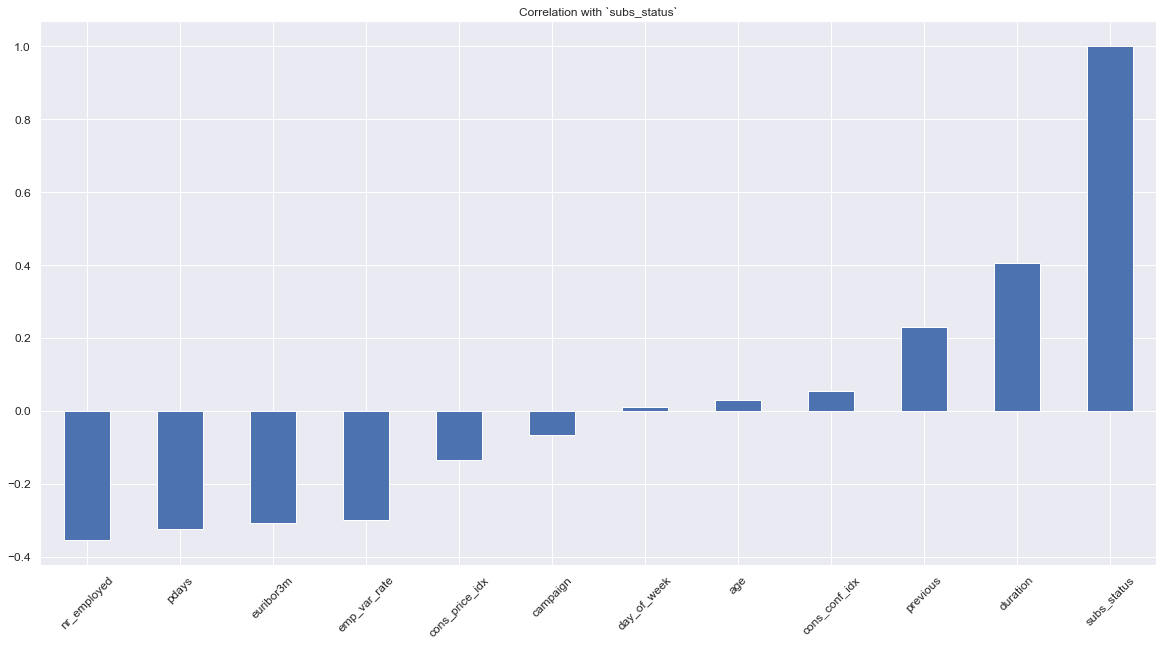

In [153]:
df.corrwith(df['subs_status']).sort_values().plot.bar(figsize=(20,10), title='Correlation with `subs_status`', fontsize=12, rot=45, grid=True)
plt.show()

In [114]:

print('X_train Before', X_train.shape)
print('y_train Before', y_train.shape)
print('X_train After', X_train.shape)
print('y_train After', y_train.shape)

X_train Before (32937, 55)
y_train Before (32937,)
X_train After (32937, 55)
y_train After (32937,)


# Model Evaluation

Accuracy: 0.91

Confusion Matrix:
[[7080  175]
 [ 555  425]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7255
           1       0.71      0.43      0.54       980

    accuracy                           0.91      8235
   macro avg       0.82      0.70      0.74      8235
weighted avg       0.90      0.91      0.90      8235



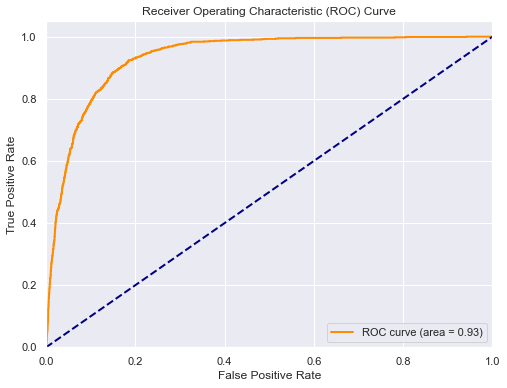

In [150]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report_str)

y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.89

Confusion Matrix:
[[6803  452]
 [ 495  485]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      7255
           1       0.52      0.49      0.51       980

    accuracy                           0.89      8235
   macro avg       0.72      0.72      0.72      8235
weighted avg       0.88      0.89      0.88      8235



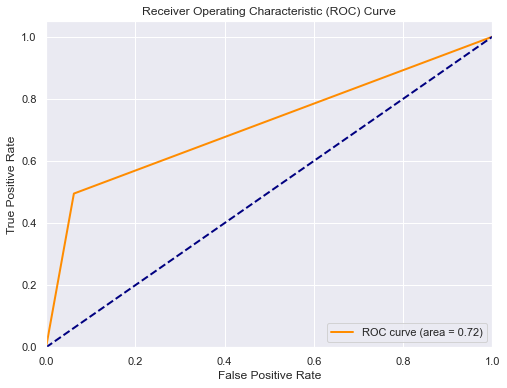

In [146]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(random_state=42)
scaler = StandardScaler()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report_str)

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, X, y):
    y_pred_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(model, X_test, y_test)



In [118]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report_str)



Accuracy: 0.91

Confusion Matrix:
[[7049  206]
 [ 552  428]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7255
           1       0.68      0.44      0.53       980

    accuracy                           0.91      8235
   macro avg       0.80      0.70      0.74      8235
weighted avg       0.90      0.91      0.90      8235



In [119]:
model = KNeighborsClassifier(n_neighbors=3)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report_str)






Accuracy: 0.90

Confusion Matrix:
[[6900  355]
 [ 502  478]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7255
           1       0.57      0.49      0.53       980

    accuracy                           0.90      8235
   macro avg       0.75      0.72      0.73      8235
weighted avg       0.89      0.90      0.89      8235



In [120]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = SVC(kernel='rbf', random_state=42)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report_str)

Accuracy: 0.90

Confusion Matrix:
[[7084  171]
 [ 629  351]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7255
           1       0.67      0.36      0.47       980

    accuracy                           0.90      8235
   macro avg       0.80      0.67      0.71      8235
weighted avg       0.89      0.90      0.89      8235



In [121]:
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report_str)

Accuracy: 0.87

Confusion Matrix:
[[6665  590]
 [ 508  472]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7255
           1       0.44      0.48      0.46       980

    accuracy                           0.87      8235
   macro avg       0.69      0.70      0.69      8235
weighted avg       0.87      0.87      0.87      8235



In [125]:
print("LogisticRegression",0.91)
print("DecisionTreeClassifier",0.89)
print("RandomForestClassifier",0.91)
print("KNeighborsClassifier",0.90)
print("GaussianNB",0.87)
print("SVC",0.90)



LogisticRegression 0.91
DecisionTreeClassifier 0.89
RandomForestClassifier 0.91
KNeighborsClassifier 0.9
GaussianNB 0.87
SVC 0.9


Based on the above result , our best performing model is Logistic Regression and The most under performed model in this case is only Naive Bayes model.

# Questions


# 1) What is the distribution of the customer ages?

Ans:- Using this we can easily evaluate 
    
Descriptive stats:
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
50%         38.00000
max         98.00000
Name: age, dtype: float64
        
The minimum age is 17 ,max age is 98 and mean age is around 40.

# 2) What is the relationship between customer age and subscription?

Ans:- By analyzing and visualizing the data and graph we can conclude that Age group between 25-34 are frequent clients and People above the age of 65 have higher acceptance rate.

# 3)Are there any other factors that are correlated with subscription?

Ans:- Based on graph above, we can conclude that:- 
top three negatively correlated : nr_employed, pdays, euribor3m, emp_var_rate
top three positively correlated : duration, and previous

# 4)What is the accuracy of the logistic regression model?

Ans:- Logistic regression is having the heighest accuracy and it is our best performing model with an accuracy of 0.91.   



                     Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7255
           1       0.71      0.43      0.54       980

    accuracy                           0.91      8235


# 5)What are the most important features for the logistic regression model?

Ans:- a) The logistic regression statistic modeling technique is used when we have a binary outcome variable. For example:will the student pass or fail? Will it rain or not? ,will he buy subscription or not? etc.

b) The logistic (or sigmoid) function transforms the log-odds into probabilities between 0 and 1.

c)Logistic regression predicts probabilities rather than class labels

# 6)What is the precision of the logistic regression model?

Ans:- Precision is a metric used in classification models to evaluate the accuracy of the positive predictions made by the model. It is the ratio of true positive predictions to the total number of positive predictions made by the model. 

In our case the precision is around 0.93 for 0 and 0.71 for 1 for Logistic regression model .

# 7)What is the recall of the logistic regression model?

Ans:-It is used in classification models to evaluate the ability of the model to capture and correctly identify all the relevant instances of the positive class. 

In our case recall value is 0.98 for 0 and 0.54 for 1 in logistic regression model.

# 8)What is the f1-score of the logistic regression model?

Ans:- The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. In our case it is 0.95 for 0 and 0.54 for 1.

# 9)How can you improve the performance of the logistic regression model?

Ans:- Some common method or ideas to improve the performance of the logistic regression model are:-

a) Handle missing data appropriately

b)Encode categorical variables properly (one-hot encoding or label encoding)

c)Identify and handle outliers in the dataset

d)Apply regularization to prevent overfitting(L1, L2 regularization)

e)To Ensure that numerical features are on a similar scale(StandardScaler or MinMaxScaler)

f)Cleaning the data properly and dealing with the missing and duplicate data.

# 10)What are the limitations of the logistic regression model?


Ans:- a) If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting.

b)The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables.

c)It constructs linear boundaries.

d)It is tough to obtain complex relationships using logistic regression. More powerful and compact algorithms such as Neural Networks can easily outperform this algorithm.

# END